In [1]:
import fsc
from fsc.devices import w7x

In [2]:
fsc.resolve.importOfflineData("C:\\Users\\Knieps\\Downloads\\w7x.fsc")

In [3]:
grid = w7x.defaultGrid.clone()
grid.nR = 128
grid.nZ = 128
grid.nPhi = 32
grid

(rMin = 4, rMax = 7, zMin = -1.5, zMax = 1.5, nSym = 5, nR = 128, nZ = 128, nPhi = 32)

In [7]:
tracer = fsc.tracer()

In [8]:
cadCoils = w7x.computeCoilFields(tracer.calculator, w7x.cadCoils(), grid = grid)

Main 0
Main 1
Main 2
Main 3
Main 4
Main 5
Main 6
Trim 0
Trim 1
Trim 2
Trim 3
Trim 4
CC 0
CC 1
CC 2
CC 3
CC 4
CC 5
CC 6
CC 7
CC 8
CC 9


In [9]:
fsc.data.writeArchive(cadCoils, "cadCoils.fsc").wait()

In [10]:
archiveCoils = fsc.data.readArchive("cadCoils.fsc").wait()

In [4]:
#config = w7x.standard(coils = cadCoils)
config = w7x.standard()

In [13]:
bPhi, bZ, bR = tracer.computeField(config, grid)

Grid: (rMin = 4, rMax = 7, zMin = -1.5, zMax = 1.5, nSym = 5, nR = 128, nZ = 128, nPhi = 32)


In [5]:
import matplotlib.pyplot as plt
import numpy as np

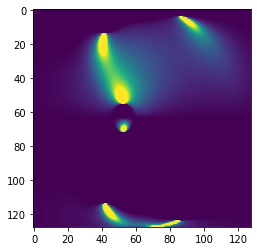

In [10]:
plt.imshow(bR[0], vmin = 0, vmax = 3)

In [8]:
points = np.asarray([5.71, 0.0, 0.0])
pcPoints = tracer.poincareInPhiPlanes(points, [0.0], 1000, config, grid, distanceLimit = 1e5)

(5.44950430393219, 6.236612391471863, -0.961969405412674, 0.9620472490787506)

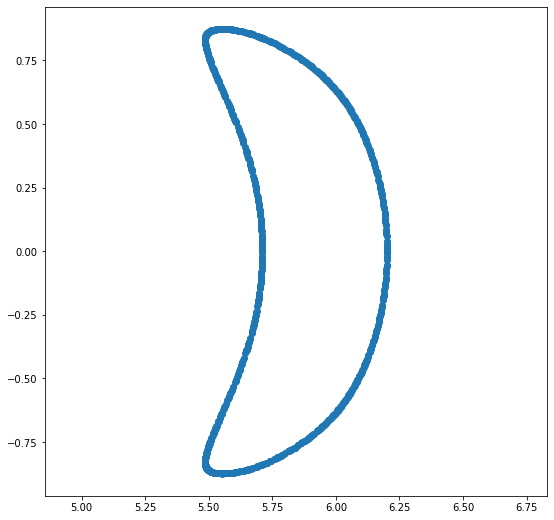

In [15]:
plt.figure(figsize=(9,9))
x, y, z = pcPoints.reshape([3, -1])[:,:1000]
plt.scatter(x, z)
plt.axis('equal')

In [16]:
x

array([5.6997185, 5.696279 , 5.681714 , 5.642682 , 5.5795684, 5.5194135,
       5.481812 , 5.4630756, 5.4548974, 5.4521937, 5.4530015, 5.457389 ,
       5.46743  , 5.4876924, 5.526332 , 5.5935087, 5.692914 , 5.8067374,
       5.9021187, 5.9650245, 6.001634 , 6.0230646, 6.037805 , 6.0519753,
       6.0711164, 6.1005106, 6.1424356, 6.1859736, 6.2047825, 6.1837735,
       6.1396985, 6.098397 , 6.0697474, 6.0510707, 6.037028 , 6.022088 ,
       6.000046 , 5.962242 , 5.89754  , 5.8004494, 5.6865463, 5.588751 ,
       5.523442 , 5.486142 , 5.466718 , 5.4572387, 5.4533486, 5.453313 ,
       5.457493 , 5.468736 , 5.493551 , 5.540233 , 5.6053104, 5.6612325,
       5.689489 , 5.698335 , 5.7000165, 5.700057 , 5.700045 , 5.7000747,
       5.6989446, 5.6921334, 5.6684656, 5.617106 , 5.5513196, 5.500266 ,
       5.4719405, 5.458705 , 5.453398 , 5.452448 , 5.455018 , 5.4621077,
       5.47701  , 5.5063314, 5.559742 , 5.64545  , 5.7567925, 5.863655 ,
       5.940986 , 5.9879932, 6.0150995, 6.032207 , 

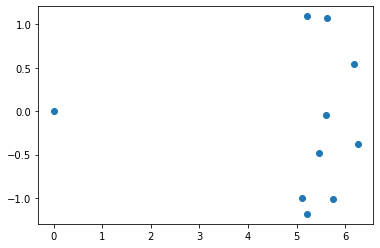

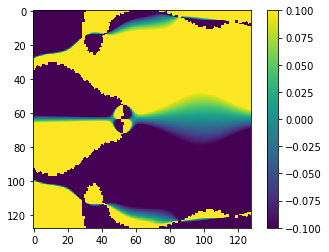

In [16]:
plt.imshow((bR / bPhi)[0], vmin = -0.1, vmax = 0.1)
plt.colorbar()

In [13]:
0.5**2 + 0.8**2 + 0.3**2

0.9800000000000001